# WELCOME!

Welcome to "***Car Price Prediction Project***". This is my first medium project of ***Machine Learning*** course. In this project I will apply many algorithms commonly used for regression problems.

Also, I will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that I will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, let's take a look at the determines and tasks.


# Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, I will use the data set which is already preprocessed and prepared for algorithms. (For EDA process please check <a href=https://github.com/sametgundogan/Auto-Scout-Exploratory-Data-Analyse>this link </a> out)


---

In this Senario, I will estimate the prices of cars using regression algorithms.

While starting I will import the necessary modules and load the data given as pkl file. Also I'll need to do a few pre-processing before moving to modelling. After that I will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** . Lastly, I will measure the success of my models with regression evaluation metrics as well as with cross validation method.

For the better results, I should try to increase the success of my models by performing hyperparameter tuning. Determine feature importances for the model. I will set my model with the most important features for resource saving. 

Finally I will compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






## Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
#%matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

pd.set_option("display.float_format",lambda x: "%.3f" % x)

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

## Data Pre-Processing

In [3]:
df = pd.read_csv("final_scout_dummy.csv")
df.head()

,price,km,prev_owner,hp,nr_of_doors,nr_of_seats,displacement,gears,age,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,vat_Unknown,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,inspection_new_Yes,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,paint_type_Perl effect,paint_type_Uni/basic,body_Convertible,body_Coupe,body_Off-Road,body_Sedans,body_Station wagon,body_Transporter,body_Van,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Diesel,fuel_LPG/CNG,upholstery_type_Part/Full Leather
0,15770,56.013,2.000,66.000,5.000,5.000,1422.000,7.000,3.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,14500,80.000,1.000,141.000,3.000,4.000,1798.000,7.000,2.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,14640,83.450,1.000,85.000,4.000,4.000,1598.000,7.000,3.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,14500,73.000,1.000,66.000,3.000,4.000,1422.000,6.000,3.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,

In [4]:
df.shape

(15909, 144)

Value range is high, so it has to be scaled

In [5]:
X = df.drop(columns="price")
y = df["price"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [9]:
lm = LinearRegression()

scaler = StandardScaler()

In [10]:
lm.fit(X_train, y_train)

LinearRegression()

In [11]:
y_train_pred = lm.predict(X_train)
y_train_pred

array([17156.62442037, 15170.17866846, 19329.85668079, ...,
       19839.87430256, 37271.51032321, 16734.95199754])

In [12]:
y_pred = lm.predict(X_test)
y_pred

array([13037.66839073,  6352.1056996 , 10779.76420679, ...,
        9978.6521282 , 15507.12594612, 37311.26138253])

In [13]:
lm.coef_

array([-2.99836219e+00,  4.50894083e+02,  8.67032661e+01,  2.98851668e+02,
       -1.55023988e+02, -5.40081720e-01,  7.03457005e+02, -2.36704534e+03,
        9.51683165e+01,  2.55264405e+02,  2.54010201e+02,  9.80458353e+01,
        2.72713978e+02, -1.63278286e+02,  2.09953316e+02, -2.90801576e+03,
        5.27252902e+01,  1.12380548e+02, -1.53108758e+02,  3.43117515e+02,
        2.57395670e+03,  5.04164683e+02,  1.91837007e+02,  3.13826644e+02,
        4.63641135e+01,  1.61596385e+02,  1.81417496e+02, -3.54582630e+02,
        5.93245904e+02,  1.18707336e+02,  2.30567672e+02, -1.96990463e+02,
        7.68369355e+02,  3.19999720e+01,  1.04286720e+03,  1.39804784e+02,
       -6.33463672e+02, -1.13906477e+02, -3.37956797e+02, -6.58315360e+01,
        8.60024767e+02, -2.95530264e+02,  1.36104810e+02,  5.19369301e+02,
       -1.68766588e+01, -1.06448916e+03, -6.16976337e+02, -4.11737965e+02,
        9.36552879e+01,  7.11265554e+02,  3.81046410e+00, -2.76403903e+01,
       -1.49294022e+02,  

In [14]:
lm.intercept_

12747.768900691883

In [15]:
train_val(y_train, y_train_pred, y_test, y_pred, "Linear Reg")

,Linear Reg_train,Linear Reg_test
R2,0.881,0.867
mae,1776.598,1846.688
mse,6354350.851,7505584.253
rmse,2520.784,2739.632


### Cross Validation for Linear Reg.

In [16]:
from sklearn.model_selection import cross_validate, cross_val_score

In [17]:
scores = cross_validate(lm, X_train, y_train,scoring = ['r2','neg_mean_absolute_error','neg_mean_squared_error', 
                                                            'neg_root_mean_squared_error'], cv = 5)

In [18]:
pd.DataFrame(scores, index=range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.061,0.003,0.885,-1779.323,-6344833.312,-2518.895
2,0.093,0.003,0.871,-1792.462,-6290461.366,-2508.079
3,0.063,0.003,0.874,-1800.097,-6320969.427,-2514.154
4,0.065,0.003,0.878,-1861.090,-7334996.944,-2708.320
5,0.052,0.002,0.869,-1805.210,-6988990.610,-2643.670


In [19]:
print("train RMSE:", 2520.784/df["price"].mean())
print("test RMSE:", 2739.632/df["price"].mean())

train RMSE: 0.13988624666596355
test RMSE: 0.1520308117339554


In [20]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:,2:].mean()

test_r2                                   0.875
test_neg_mean_absolute_error          -1807.637
test_neg_mean_squared_error        -6656050.332
test_neg_root_mean_squared_error      -2578.624
dtype: float64

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [21]:
ridge_model = Ridge()

In [22]:
ridge_model.fit(X_train, y_train)

Ridge()

In [23]:
ridge_model.coef_

array([-3.00135309e+00,  4.52722989e+02,  8.71593502e+01,  2.96547109e+02,
       -1.60001070e+02, -5.99524684e-01,  7.09133112e+02, -2.36598631e+03,
        9.15531457e+01,  2.50235216e+02,  2.78047229e+02,  1.05433319e+02,
        2.73560786e+02, -1.63246362e+02,  2.11847089e+02, -1.44775078e+03,
        5.82061080e+01,  1.07411575e+02, -1.57216006e+02,  3.48455473e+02,
        2.56572102e+03,  4.93225726e+02,  1.87381340e+02,  3.12902520e+02,
        2.71616194e+01,  1.60247518e+02,  1.82970365e+02, -3.51099600e+02,
        5.90489579e+02,  1.16726806e+02,  2.31238583e+02, -1.93444606e+02,
        7.74791724e+02,  2.49668619e+01,  1.04113431e+03,  1.38211615e+02,
       -6.31297280e+02, -1.00735022e+02, -3.36307951e+02, -5.89032980e+01,
        8.64872197e+02, -2.86649126e+02,  1.37475340e+02,  5.20869918e+02,
       -1.46727023e+01, -1.03295978e+03, -5.48154097e+02, -4.16168870e+02,
        8.90843048e+01,  7.08999798e+02,  1.04001332e+01, -2.79850604e+01,
       -1.53137038e+02,  

In [24]:
ridge_model.intercept_

12696.047546216509

In [25]:
y_test_pred = ridge_model.predict(X_test)
y_train_pred = ridge_model.predict(X_train)

In [26]:
train_val(y_train, y_train_pred, y_test, y_test_pred, "ridge")

,ridge_train,ridge_test
R2,0.881,0.869
mae,1777.307,1842.826
mse,6361413.465,7388917.856
rmse,2522.184,2718.256


In [27]:
# hyperparameter tuning with CV

In [28]:
alpha_space = np.linspace(1, 5, 100)
alpha_space

array([1.        , 1.04040404, 1.08080808, 1.12121212, 1.16161616,
       1.2020202 , 1.24242424, 1.28282828, 1.32323232, 1.36363636,
       1.4040404 , 1.44444444, 1.48484848, 1.52525253, 1.56565657,
       1.60606061, 1.64646465, 1.68686869, 1.72727273, 1.76767677,
       1.80808081, 1.84848485, 1.88888889, 1.92929293, 1.96969697,
       2.01010101, 2.05050505, 2.09090909, 2.13131313, 2.17171717,
       2.21212121, 2.25252525, 2.29292929, 2.33333333, 2.37373737,
       2.41414141, 2.45454545, 2.49494949, 2.53535354, 2.57575758,
       2.61616162, 2.65656566, 2.6969697 , 2.73737374, 2.77777778,
       2.81818182, 2.85858586, 2.8989899 , 2.93939394, 2.97979798,
       3.02020202, 3.06060606, 3.1010101 , 3.14141414, 3.18181818,
       3.22222222, 3.26262626, 3.3030303 , 3.34343434, 3.38383838,
       3.42424242, 3.46464646, 3.50505051, 3.54545455, 3.58585859,
       3.62626263, 3.66666667, 3.70707071, 3.74747475, 3.78787879,
       3.82828283, 3.86868687, 3.90909091, 3.94949495, 3.98989

In [29]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [30]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([1.        , 1.04040404, 1.08080808, 1.12121212, 1.16161616,
       1.2020202 , 1.24242424, 1.28282828, 1.32323232, 1.36363636,
       1.4040404 , 1.44444444, 1.48484848, 1.52525253, 1.56565657,
       1.60606061, 1.64646465, 1.68686869, 1.72727273, 1.76767677,
       1.80808081, 1.84848485, 1.88888889, 1.92929293, 1.96969697,
       2.01010101, 2.05050505, 2.09090909, 2.13131313, 2.17171717,
       2.212121...
       3.82828283, 3.86868687, 3.90909091, 3.94949495, 3.98989899,
       4.03030303, 4.07070707, 4.11111111, 4.15151515, 4.19191919,
       4.23232323, 4.27272727, 4.31313131, 4.35353535, 4.39393939,
       4.43434343, 4.47474747, 4.51515152, 4.55555556, 4.5959596 ,
       4.63636364, 4.67676768, 4.71717172, 4.75757576, 4.7979798 ,
       4.83838384, 4.87878788, 4.91919192, 4.95959596, 5.        ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [31]:
ridge_cv_model.alpha_ 

4.232323232323233

In [32]:
ridge_cv_model.best_score_

-2574.8979307071068

In [33]:
y_test_pred = ridge_cv_model.predict(X_test)
y_train_pred = ridge_cv_model.predict(X_train)

In [34]:
train_val(y_train, y_train_pred, y_test, y_test_pred, "ridgeCV")

,ridgeCV_train,ridgeCV_test
R2,0.881,0.870
mae,1778.427,1840.940
mse,6378786.894,7346540.560
rmse,2525.626,2710.450


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [35]:
from sklearn.linear_model import Lasso, LassoCV

In [36]:
lasso_model = Lasso(max_iter=1000)
lasso_model.fit(X_train, y_train)

Lasso()

In [37]:
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

In [38]:
train_val(y_train, y_train_pred, y_test, y_test_pred, "lasso")

,lasso_train,lasso_test
R2,0.881,0.870
mae,1777.199,1840.250
mse,6378902.441,7357596.155
rmse,2525.649,2712.489


### Cross Valid. for Lasso

In [39]:
scores = cross_validate(lasso_model, X_train, y_train,scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error']
                           , cv = 5)

In [40]:
pd.DataFrame(scores, index=range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.180,0.002,0.886,-1772.240,-6281561.617,-2506.304
2,0.121,0.003,0.872,-1789.303,-6267686.440,-2503.535
3,0.157,0.003,0.875,-1796.839,-6296099.681,-2509.203
4,0.108,0.002,0.877,-1859.805,-7340923.827,-2709.414
5,0.109,0.003,0.871,-1793.385,-6879430.564,-2622.867


In [41]:
lasso_cv_df = pd.DataFrame(scores, index=range(1,6))

In [42]:
lasso_cv_df.iloc[:,2:].mean()

test_r2                                   0.876
test_neg_mean_absolute_error          -1802.314
test_neg_mean_squared_error        -6613140.426
test_neg_root_mean_squared_error      -2570.265
dtype: float64

In [43]:
alpha_space = np.linspace(1, 5, 100)
alpha_space

array([1.        , 1.04040404, 1.08080808, 1.12121212, 1.16161616,
       1.2020202 , 1.24242424, 1.28282828, 1.32323232, 1.36363636,
       1.4040404 , 1.44444444, 1.48484848, 1.52525253, 1.56565657,
       1.60606061, 1.64646465, 1.68686869, 1.72727273, 1.76767677,
       1.80808081, 1.84848485, 1.88888889, 1.92929293, 1.96969697,
       2.01010101, 2.05050505, 2.09090909, 2.13131313, 2.17171717,
       2.21212121, 2.25252525, 2.29292929, 2.33333333, 2.37373737,
       2.41414141, 2.45454545, 2.49494949, 2.53535354, 2.57575758,
       2.61616162, 2.65656566, 2.6969697 , 2.73737374, 2.77777778,
       2.81818182, 2.85858586, 2.8989899 , 2.93939394, 2.97979798,
       3.02020202, 3.06060606, 3.1010101 , 3.14141414, 3.18181818,
       3.22222222, 3.26262626, 3.3030303 , 3.34343434, 3.38383838,
       3.42424242, 3.46464646, 3.50505051, 3.54545455, 3.58585859,
       3.62626263, 3.66666667, 3.70707071, 3.74747475, 3.78787879,
       3.82828283, 3.86868687, 3.90909091, 3.94949495, 3.98989

In [44]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv = 5, max_iter= 100000,random_state=42)

In [45]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=array([1.        , 1.04040404, 1.08080808, 1.12121212, 1.16161616,
       1.2020202 , 1.24242424, 1.28282828, 1.32323232, 1.36363636,
       1.4040404 , 1.44444444, 1.48484848, 1.52525253, 1.56565657,
       1.60606061, 1.64646465, 1.68686869, 1.72727273, 1.76767677,
       1.80808081, 1.84848485, 1.88888889, 1.92929293, 1.96969697,
       2.01010101, 2.05050505, 2.09090909, 2.13131313, 2.17171717,
       2.212121...
       3.82828283, 3.86868687, 3.90909091, 3.94949495, 3.98989899,
       4.03030303, 4.07070707, 4.11111111, 4.15151515, 4.19191919,
       4.23232323, 4.27272727, 4.31313131, 4.35353535, 4.39393939,
       4.43434343, 4.47474747, 4.51515152, 4.55555556, 4.5959596 ,
       4.63636364, 4.67676768, 4.71717172, 4.75757576, 4.7979798 ,
       4.83838384, 4.87878788, 4.91919192, 4.95959596, 5.        ]),
        cv=5, max_iter=100000, random_state=42)

In [46]:
lasso_cv_model.alpha_

1.4848484848484849

In [47]:
y_test_pred = lasso_cv_model.predict(X_test)
y_train_pred = lasso_cv_model.predict(X_train)

In [48]:
train_val(y_train, y_train_pred, y_test, y_test_pred, "lasso_cv" )

,lasso_cv_train,lasso_cv_test
R2,0.880,0.871
mae,1778.138,1837.264
mse,6398787.974,7324611.521
rmse,2529.583,2706.402


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [49]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [50]:
elastic_model = ElasticNet(random_state= 42)

In [51]:
elastic_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [52]:
y_test_pred = elastic_model.predict(X_test)
y_train_pred = elastic_model.predict(X_train)

In [53]:
train_val(y_train, y_train_pred, y_test, y_test_pred, "elastic_net")

,elastic_net_train,elastic_net_test
R2,0.783,0.783
mae,2429.756,2476.155
mse,11590446.888,12278109.412
rmse,3404.475,3504.013


In [54]:
en_cv = ElasticNetCV(alphas= alpha_space, l1_ratio= np.linspace(0,1,10),cv = 5)
en_cv.fit(X_train, y_train)

ElasticNetCV(alphas=array([1.        , 1.04040404, 1.08080808, 1.12121212, 1.16161616,
       1.2020202 , 1.24242424, 1.28282828, 1.32323232, 1.36363636,
       1.4040404 , 1.44444444, 1.48484848, 1.52525253, 1.56565657,
       1.60606061, 1.64646465, 1.68686869, 1.72727273, 1.76767677,
       1.80808081, 1.84848485, 1.88888889, 1.92929293, 1.96969697,
       2.01010101, 2.05050505, 2.09090909, 2.13131313, 2.17171717,
       2.2...
       4.03030303, 4.07070707, 4.11111111, 4.15151515, 4.19191919,
       4.23232323, 4.27272727, 4.31313131, 4.35353535, 4.39393939,
       4.43434343, 4.47474747, 4.51515152, 4.55555556, 4.5959596 ,
       4.63636364, 4.67676768, 4.71717172, 4.75757576, 4.7979798 ,
       4.83838384, 4.87878788, 4.91919192, 4.95959596, 5.        ]),
             cv=5,
             l1_ratio=array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]))

In [55]:
y_test_pred = en_cv.predict(X_test)
y_train_pred = en_cv.predict(X_train)

In [56]:
train_val(y_train, y_train_pred, y_test, y_test_pred, "elastic_net_cv")

,elastic_net_cv_train,elastic_net_cv_test
R2,0.880,0.871
mae,1778.138,1837.264
mse,6398787.974,7324611.521
rmse,2529.583,2706.402


In [57]:
en_cv.alpha_

1.4848484848484849

In [58]:
en_cv.l1_ratio_

1.0

# Pickle

In [59]:
import pickle
pickle.dump(lasso_model, open('pipe_model', 'wb'))

# Visually Compare Models Performance In a Graph

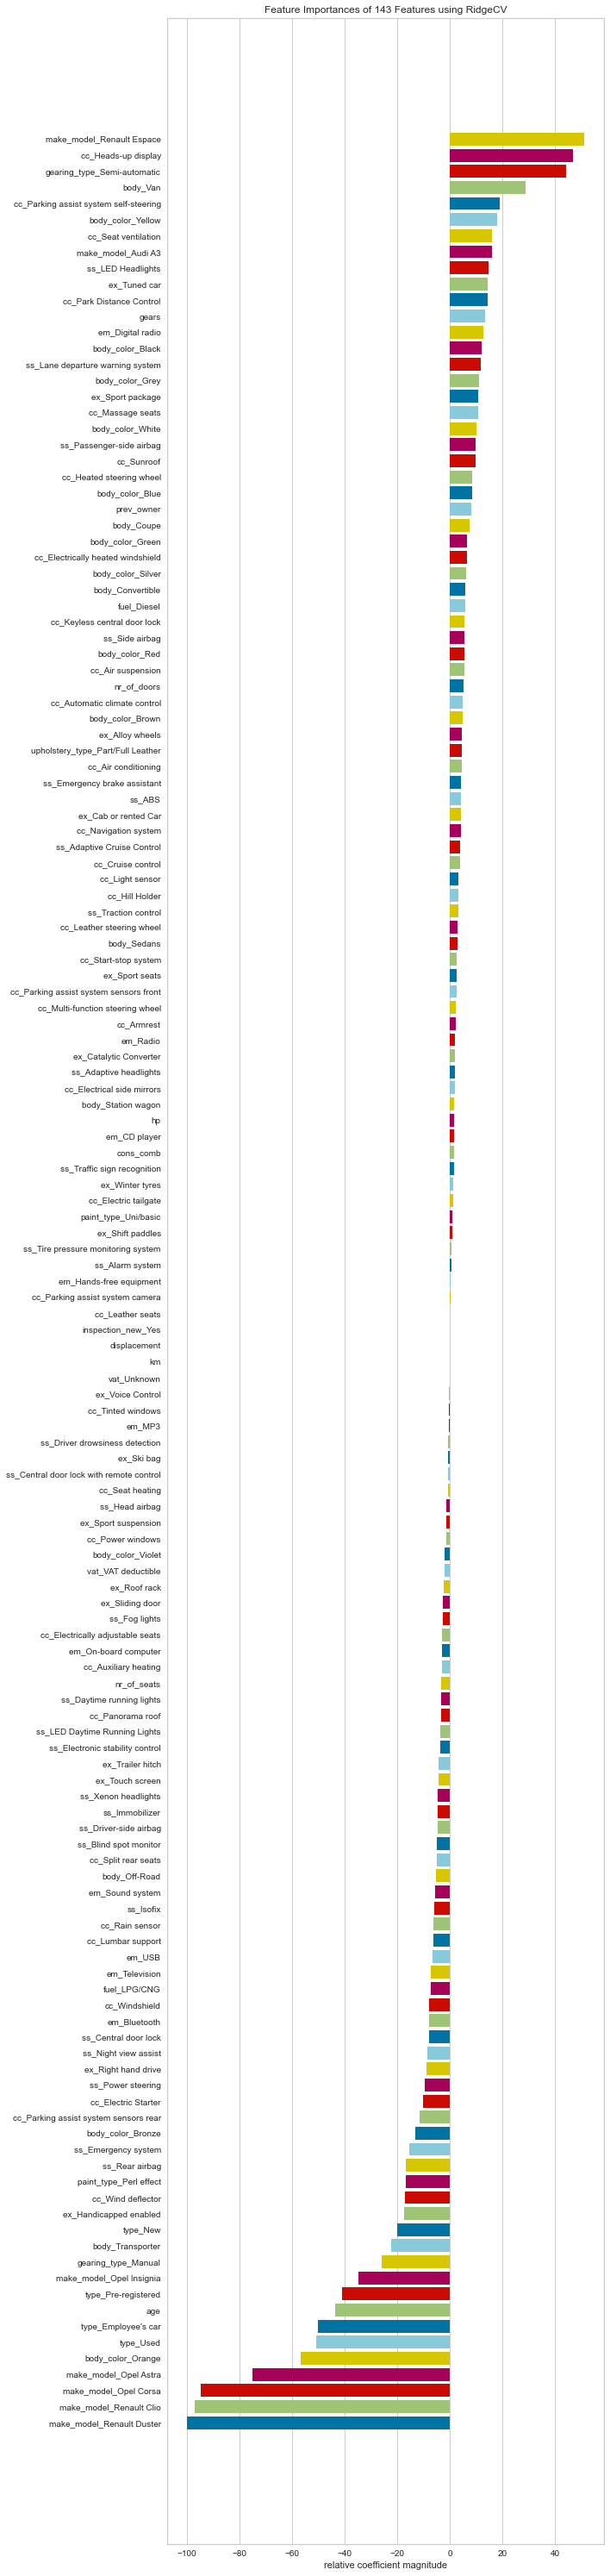

<AxesSubplot:title={'center':'Feature Importances of 143 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [60]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

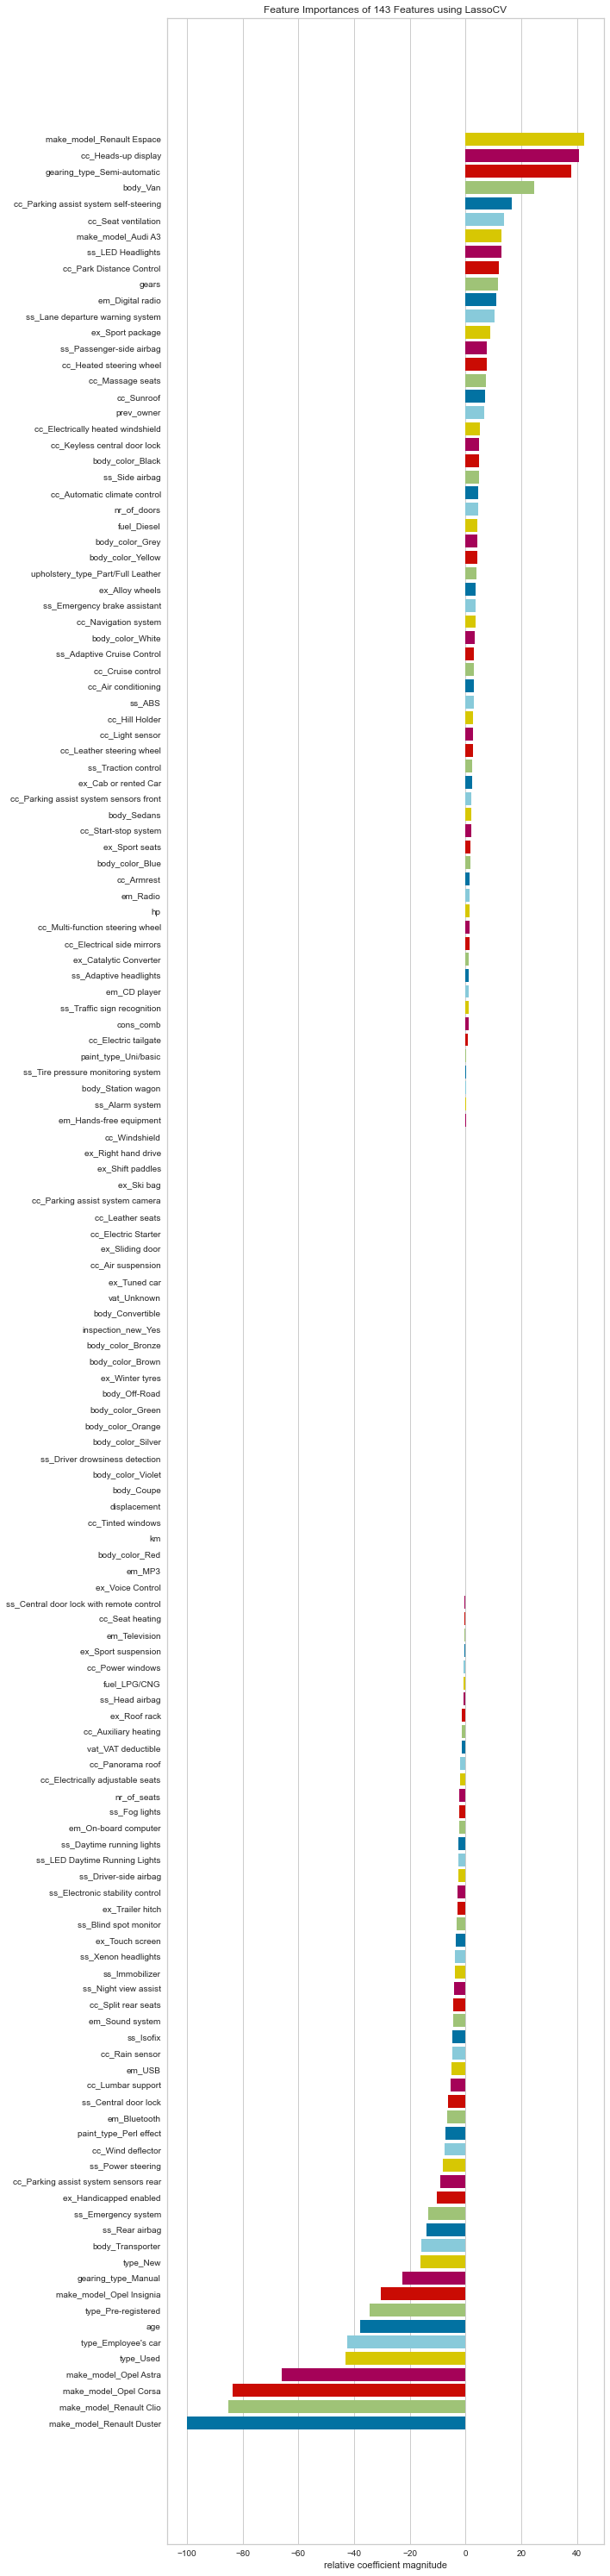

<AxesSubplot:title={'center':'Feature Importances of 143 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [61]:

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

In [62]:
# This is unnecessary since the elastic net scores are exactly the same with lasso scores.
"""
viz = FeatureImportances(en_cv, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()"""

'\nviz = FeatureImportances(en_cv, labels=pd.DataFrame(X_train).columns)\nvisualizer = RadViz(size=(720, 3000))\nviz.fit(X_train, y_train)\nviz.show()'